# Owid Energy Data Exploration

### Exploration and Visualization of Energy Consumption and Greenhouse Gas Emissions Worldwide 

Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv("owid-energy-data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.5+ MB


##### 2022 Snapshot of Top Energy Consumers

In [4]:
countries_2022 = data[((data['iso_code'].notna()) & (data['year'] == 2022))]

In [5]:
top_gdp = countries_2022[["country", "gdp"]].sort_values("gdp", ascending=False)
print(top_gdp.head(10))

              country           gdp
4504            China  2.696602e+13
20491   United States  1.949317e+13
9327            India  1.047625e+13
10238           Japan  4.774495e+12
7957          Germany  3.909613e+12
16715          Russia  3.731441e+12
9451        Indonesia  3.500093e+12
3059           Brazil  3.187413e+12
7501           France  2.671569e+12
20367  United Kingdom  2.615231e+12


In [6]:
energy_consumption = countries_2022[["country", "primary_energy_consumption"]].sort_values("primary_energy_consumption", ascending=False)
print(energy_consumption.head(10))

             country  primary_energy_consumption
4504           China                   44516.312
20491  United States                   26504.305
9327           India                   10103.183
16715         Russia                    8632.184
10238          Japan                    5004.881
3865          Canada                    3971.974
3059          Brazil                    3732.201
17969    South Korea                    3542.344
9575            Iran                    3466.873
7957         Germany                    3413.000


In [7]:
ggas_emissions = countries_2022[["country", "greenhouse_gas_emissions"]].sort_values("greenhouse_gas_emissions", ascending=False)
print(ggas_emissions.head(10))

             country  greenhouse_gas_emissions
4504           China                   5183.77
20491  United States                   1654.66
9327           India                   1310.12
10238          Japan                    530.01
16715         Russia                    509.11
17183   Saudi Arabia                    283.84
17969    South Korea                    273.95
7957         Germany                    238.37
9575            Iran                    231.56
9451       Indonesia                    225.45


The leaders in:

    1. GDP (data is adjusted for inflation and differences in the cost of living between countries)
    2. Energy Consumption 
    3. GreenhouseGas Emissions

are very similar with few exceptions. 
    

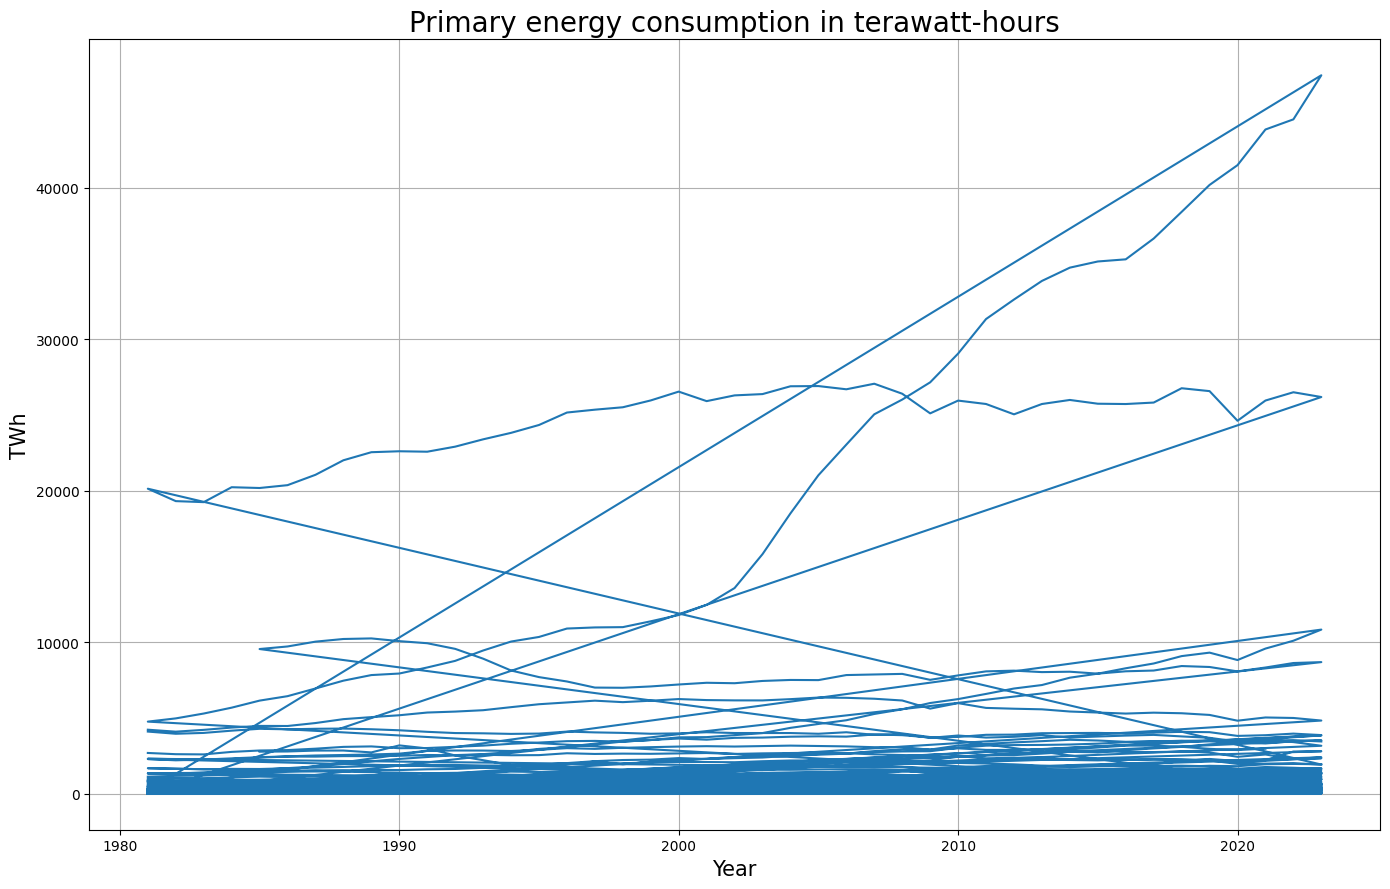

In [10]:
countries = data[(data['iso_code'].notna()) & (data["year"] > 1980)]

plt.figure(figsize=(14, 9))
plt.plot(countries["year"], countries['primary_energy_consumption'])
plt.title('Primary energy consumption in terawatt-hours', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('TWh', fontsize=15)
plt.grid(True)
plt.tight_layout()